In [40]:
!pip install easyocr

from matplotlib import pyplot as plt

from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils

from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


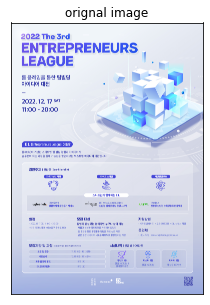

[INFO] OCR'ing input image...


['2022 The 3rd',
 'ENTREPRENEURS',
 'LEAGUE',
 '틀 플레이올 통한 팀빌딩',
 '아이디어 대전',
 '2022.12. 17 SAT',
 '1100',
 '2O.00',
 'EL [Entrepreneurs Leaguel이l란?',
 '틀(Role)에 기반한 스타트업 팀 빌딩 경험과 아이디어가',
 '슬루선이 되는 과정올 통해 가능성올 발견해보는 익스트림 아이디어 대전입니다:',
 '경연주제',
 '친환경 (Eco-Friendly)',
 '지속가능한 사회',
 '라이프스타일',
 '자연환경보호',
 '스타트업과 함께하는 EL',
 '(주) 어클리램',
 'code',
 'In',
 '(주) 리더스오보그런소사이어티',
 '(주) 아트와',
 'uglee lab',
 '생활쓰레기 문전수거 서비스',
 '8r도',
 "'square",
 '친환경 캠페인 통합 운영 시스템',
 'ARTW',
 '친환경 친안전 수류양용로봇 플렉품',
 '일정',
 '모집 대상',
 '지원방법',
 '2022.12.17 (토) 11:00 ~ 20.00',
 '창업에 관심있는 분이라면 누구나 참여 가능',
 '시작점 흉페이지',
 '오른 프로그램 > EL 신청서 작성',
 '대전 테크노파크 10층 (중구 중앙로 119)',
 '새롭고 신선한 아이디어름 가진 예비창업자',
 '팀 빌딩올 통한 창업활동 경험올 하고 싶은 사람',
 '문의처',
 '같은 공감대 가지려 새로운 네트위크 형성 원하는 사람',
 '(주)시작점',
 'contact@startingpoint.cokr',
 '모집기간 및 과정 * 자세한 사함은 흉-어지플확인해주세요',
 '시상내역',
 '상금 총 900만원',
 '모집 및 접수',
 '11.29 (화) - 12.13 (화)',
 '사전심사',
 '12.13 (화) - 12.14 (수)',
 '최종 참가자 발표',
 '12.15 (목)',
 '챔런저 1등',
 '마스터 2등',
 '다이아 3등',
 '상금 350만원 &',
 'E L (오

In [41]:
from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/Colab Notebooks/2차프로젝트 EasyOCR/12월 아이디어톤 EL_포스터.jpg'
img_array = np.fromfile(path, np.uint8)
org_image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
# cv2_imshow(org_image)
plt_imshow("orignal image", org_image)

langs = ['ko', 'en']
 
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
simple_results = reader.readtext(org_image, detail = 0)
simple_results

In [3]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-h2qbkl20
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-h2qbkl20
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=07a1779900a60f2db3670e3660e9b19e5de2a8d307b429a3e234196d8f852467
  Stored in directory: /tmp/pip-ephem-wheel-cache-fn63f4u0/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [4]:
from hanspell import spell_checker
import string

# 특수문자 제거
simple_result = []
for i in range(len(simple_results)) :
  simple_result.append(simple_results[i].translate(str.maketrans('', '', string.punctuation)))

spelled_sent = spell_checker.check(simple_result)

checked_sent = []
for i in range (len(simple_results)) :
 checked_sent.append(spelled_sent[i].checked)

print(checked_sent)

['2022 The 3rd', 'ENTREPRENEURS', 'LEAGUE', '틀 플레이 올 통한 팀 빌딩', '아이디어 대전', '202212 17 SAT', '1100', '2O00', 'EL Entrepreneurs Leaguel이 l란', '틀 Role에 기반한 스타트업 팀 빌딩 경험과 아이디어가', '슬루 선임 되는 과정 올 통해 가능성 올 발견해보는 익스트림 아이디어 대전입니다', '경연 주제', '친환경 EcoFriendly', '지속 가능한 사회', '라이프스타일', '자연환경보호', '스타트 업과 함께하는 EL', '주 어클리램', 'code', 'In', '주 리더스 오보 그런 소사이어티', '주 아트와', 'uglee lab', '생활쓰레기 문전수거 서비스', '8r도', 'square', '친환경 캠페인 통합 운영 시스템', 'ARTW', '친환경 친안전 수류 양용 로봇 플렉품', '일정', '모집 대상', '지원방법', '20221217 토 1100  2000', '창업에 관심 있는 분이라면 누구나 참여 가능', '시작점 흉페이지', '오른 프로그램  EL 신청서 작성', '대전 테크노파크 10층 중구 중앙로 119', '새롭고 신선한 아이디 어름 가진 예비창업자', '팀 빌딩 올 통한 창업활동 경험 올 하고 싶은 사람', '문의처', '같은 공감대 가지려 새로운 네트워크 형성 원하는 사람', '준 시작점', 'contactstartingpointcokr', '모집 기간 및 과정  자세한 사함은 흉어 지플 확인해주세요', '시상내역', '상금 총 900만 원', '모집 및 접수', '1129 화  1213 화', '사전심사', '1213 화  1214 수', '최종 참가자 발표', '1215 목', '챔런저 1등', '마스터 2등', '다이아 3등', '상금 350만 원', 'E L 오프라인', '1217 토', '맵 버십 이용권', '상금 250만 원', '각 상금 150만 원', 'SV', '철', 'bluepoint', 'GROU

In [ ]:
# PDF 읽기

In [14]:
pip install aspose-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68.8 MB 30 kB/s 


In [16]:
import aspose.words as aw

# PDF 파일 로드
doc = aw.Document("/content/drive/MyDrive/Colab Notebooks/2차프로젝트 EasyOCR/K-Startup[공고문] 2023년 예비창업‧초기창업‧창업도약 패키지 신규 주관기관 모집공고.pdf")

# PDF를 TXT로 저장
doc.save("pdf-to-text.txt")

In [18]:
file = open("./pdf-to-text.txt", "r")
strings = file.readlines()
print(strings)
file.close()

['\n', 'Evaluation Only. Created with Aspose.Words. Copyright 2003-2022 Aspose Pty Ltd.\n', '중소벤처기업부  공고  제 2022 - 590호\n', '2023년  예비창업․초기창업․창업도약  패키지  사업\n', '신규  주관기관  모집공고\n', '성장단계별 (예비 ‧ 초기 ‧ 도약기 ) 창업기업  발굴  및  육성 을  위해  우수한 창업지원  역량 을  갖춘  예비창업 ‧ 초기창업 ‧ 창업도약  패키지  사업의 주관기관 을  다음과  같이  모집  공고합니다 .\n', '2022년  12월  19일 중소벤처기업부장관\n', '※ 본  모집공고는  (예비)창업기업을  지원할  주관기관을  모집하는  공고문이며,   ’23년  예산안  확정  결과에  따라  선정규모  및  지원예산 은  변동 될  수  있음\n', '1\t 사업  개요\n', ' \n', '사업명\n', '사업  개요\n', '주관기관\n', '선정  규모\n', '운영비  지원\n', '예비창업 패키지\n', '•  기술창업  아이디어를  보유한  예비창업자의 성공창업을  위해  사업화자금,  비즈니스모델 고도화  및  시제품  제작  등을  지원\n', '27개  내외\n', '정부지원금 3.8억원  내외\n', '초기창업 패키지\n', '• 창업  3년  이내  초기창업기업의  시장안착을 위해  사업화자금,  실증  및  판로개척,  초기 투자유치  등을  지원\n', '20개  내외\n', '정부지원금 4억원  내외\n', '창업도약 패키지\n', '•  창업  3년  초과  7년  이내  도약기창업기업의 성장을  위해  사업화자금,  글로벌시장  진출 및  후속투자유치, 대기업  협업  등을  지원\n', '13개  내외\n', '정부지원금 4억원  내외\n', '* 선정규모와  운영비는  예산안  확정  및  선정평가  결과  등에  따라  변동될  수  있음\n', '  ** 사업별  주관기관  신청요건,

In [ ]:
# 한글파일 읽기

In [30]:
!pip install --user --pre pyhwp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install olefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 4.8 MB/s 
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35430 sha256=f63444d4c11a5d0b12c425dc9c495b03ef3e9fb27338394d6670fafe5f12a030
  Stored in directory: /root/.cache/pip/wheels/0b/d8/16/1e2d32ad7455728b8af9efdb9d2a0c3d03cd8f2e4be0191b8c
Successfully built olefile


In [32]:
import olefile

f = olefile.OleFileIO('/content/drive/MyDrive/Colab Notebooks/2차프로젝트 EasyOCR/K-Startup1. 제1회 IPO 기술특례상장 세미나 지원사업 공고문.hwp')
encoded_text = f.openstream('PrvText').read()
decoded_text = encoded_text.decode('UTF-16')

print(decoded_text)

      <제1회 IPO 기술특례상장 세미나 지원사업>

기술력과 성장성이 인정되는 중소기업에게 체계적인 상장 전략을 제공하기 위한 제 1회 IPO 기술특례상장 세미나 지원사업을 다음과 같이 공고하오니, 사업에 참여하고자 하는 스타트업 및 중소기업은 안내에 따라 신청하시기 바랍니다.

2022년 12월 19일
한국중소기업발전협회장

< 1. 사업개요><>

가. 추진 배경

◦ IPO 상장 전략 중 기술특례상장은 성장가능성이 높은 핵심기술 보유 기업의 기술성을 평가하여, 코스닥 시장에 진입할 수 있는 기회를 부여하는 제도

◦ 기술특례상장 기업 수는 2010년 5개에서 2021년 25개로 매해 증가 추세에 있으며, 이들의 장기 주가 성과는 일반상장보다 좋은 성과를 보임.

◦ 기술특례상장을 위해서는 전문평가기관을 통해 기술성 등급을 확보해야 하며, 높은 등급으로 평가받기 위해선 기술의 완성도와 경쟁 우위도, 기술 관련 인력 구성을 체계적으로 증명해야 함.

◦ 또한, 기술의 상용화, 관련 시장규모, 시장 경쟁력 등 시장성을 증명할 수 있는 근거자료를 마련해야 하며, 향후 기술 사업화 실현 가능성에 대한 로드맵을 제시할 수 있어야 함.

◦ 기술특례상장에 성공하기 위해서는 2~3개년 동안 체계적으로 시장성과 기술성이 반영된 지식재산권을 확보해야 함. 이는 지식재산권 로드맵을 구축함으로써 전략적으로 실행 가능

<『특허 포트폴리오 로드맵?』>
<◾ 혁신 기술 보유 기업의 기술 내용을 구체화하고, 관련 기술에 대한 주요 4개국 국가 특허 분석 ◾ 전 세계 국가별 영향력 있는 특허를 선별하여 해당 특허들의 세부 내용을 분석하고, 권한 범위를 설정 ◾ 혁신 기술을 보유한 국내 기업의 지식재산권 확보 로드맵을 구상하여, 시간과 비용의 낭비 없이 기술 확보 및 증명 절차를 진행하기 위한 사전 준비>

나. 목    적

 ◦ 혁신 기술을 보유한 중소기업이 기술성과 시장성을 체계적이고 효율적으로 증명할 수 있도록 전략을 구축하여 기술특례상장에 도전할 수 있도록 지원


In [ ]:
# 한글 전체 파일 못 가져오는거 같아서 다른 코드로 시도하겠음 >> 코드가 안 먹힘

In [36]:
# !pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# import os
# import pandas as pd

# import ole

In [39]:
# dir_path = '/content/drive/MyDrive/Colab Notebooks/2차프로젝트 EasyOCR/'
# hwp_name ='K-Startup1. 제1회 IPO 기술특례상장 세미나 지원사업 공고문.hwp'
# hwp_path = os.path.join(dir_path, hwp_name)

# f = ole.OleFile(hwp_path)

# content = f.get_stream('PrvText').decode('utf-16le')
# print(content)

AttributeError: ignored

In [ ]:
# 한글 전체 파일 못 가져오는거 같아서 다른 코드로 시도하겠음2 >> 코드가 안 먹힘

In [ ]:
# !pip install pdfminer

In [ ]:
# from io import StringIO
# from pdfminer.converter import TextConverter
# from pdfminer.layout import LAParams
# from pdfminer.pdfdocument import PDFDocument
# from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
# from pdfminer.pdfpage import PDFPage
# from pdfminer.pdfparser import PDFParser

# encoding='uft-8'

# def read_pdf_PDFMINER(pdf_file_path):
#     output_string = StringIO()
#     with open(pdf_file_path, 'rb') as f:
#         parser = PDFParser(f)
#         doc = PDFDocument(parser)
#         rsrcmgr = PDFResourceManager()
#         device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
#         interpreter = PDFPageInterpreter(rsrcmgr, device)
#         for page in PDFPage.create_pages(doc):
#             interpreter.process_page(page)
#     return str(output_string.getvalue())

# read_pdf_PDFMINER("/content/drive/MyDrive/Colab Notebooks/2차프로젝트 EasyOCR/K-Startup[공고문] 2023년 예비창업‧초기창업‧창업도약 패키지 신규 주관기관 모집공고.pdf")

In [ ]:
# from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
# from pdfminer.converter import TextConverter
# from pdfminer.layout import LAParams
# from pdfminer.pdfpage import PDFPage
# from io import StringIO

# def convert_pdf_to_txt():
#   #pdf리소스 매니저 객체 생성
#   rsrcmgr = PDFResourceManager()
#   #문자열 데이터를 파일처럼 처리하는 stringio -> pdf 파일 내용이 여기 담김
#   retstr = StringIO()
#   codec = 'utf-8'
#   laparams = LAParams()
#   device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
#   fp = open('/content/drive/MyDrive/Colab Notebooks/2차프로젝트 EasyOCR/K-Startup[공고문] 2023년 예비창업‧초기창업‧창업도약 패키지 신규 주관기관 모집공고.pdf', 'rb')
#   interpreter = PDFPageInterpreter(rsrcmgr, device)
#   password = ""
#   maxpages = 0
#   caching = True
#   pagenos=set()
  
#   for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password, caching=caching, check_extractable=True) :
#     interpreter.process_page(page)
#   #text에 결과가 담김
#   text = retstr.getvalue()
  
#   fp.close()
#   device.close()
#   retstr.close()
#   return text

# v = convert_pdf_to_txt()
# print (v)